# Face Metrics Experiments

In [1]:
import sys
sys.path.append("..")

from newMesh import*
from PolyllaFace import PolyllaFace
import matplotlib.pyplot as plt

import time
import os

polylla_inradoius = []
polylla_circumradoius = []
polylla_area = []

inradious = 'r'
# circumradious = 'R'
area = 'a'

n_experiments = 5

In [2]:
def run_polylla(n, distribution, flag):
    filename = "../data/Experiments/"+ str(n) + distribution +".1"
    node_file = filename + ".node"
    ele_file = filename + ".ele"
    face_file = filename + ".face"

    t0 = time.time()
    mesh= FaceTetrahedronMesh(node_file, face_file, ele_file)
    polyllaFace_mesh = PolyllaFace(mesh,flag)
    tf = time.time()

    dtM = tf - t0 

    print('Tiempo:',dtM,'segs')
    edge_ratio = polyllaFace_mesh.edge_ratio()
    tetra_per_poly = polyllaFace_mesh.tetra_per_poly()
    faces_per_poly = polyllaFace_mesh.faces_per_poly()
    convex_polyhedrons = polyllaFace_mesh.convex_polyhedrons()
    polyhedron_area_ratio = polyllaFace_mesh.polyhedron_area()
    
    # print(polyllaFace_mesh.mesh.face_list[4],polyllaFace_mesh.mesh.face_list[12])
    print('\n Stats polylla:')
    polyllaFace_mesh.get_info()
    print('Polyhedrons are convex:', convex_polyhedrons)
    filename = 'Files/polylla_'+distribution+str(n)+flag
    polyllaFace_mesh.writePolygonFile(filename)
    # print(polyllaFace_mesh.mesh.face_list[4],polyllaFace_mesh.mesh.face_list[12])
    #polyllaFace_mesh.printOFF_each_poly('../logs/polys'+flag+filename)
    os.system("./kernel "+ filename +".txt")
    polyhedrom_volume_ratio = polyllaFace_mesh.volume_ratio(filename+'_kernel_volumes')
    
    print('Mean Edge Ratio:', edge_ratio[0])
    print('Minimum Edge Ratio:', edge_ratio[1])
    print('Maximum Edge Ratio:', edge_ratio[2])
    print('Mean Tetrahedron per Polyhedron:', tetra_per_poly[0])
    print('Minimum Tetrahedron per Polyhedron:', tetra_per_poly[1])
    print('Maximum Tetrahedron per Polyhedron:', tetra_per_poly[2])
    print('Mean Faces per Polyhedron:', faces_per_poly[0])
    print('Minimum Faces per Polyhedron:', faces_per_poly[1])
    print('Maximum Faces per Polyhedron:', faces_per_poly[2])
    print('Mean Volume Ratio:', polyhedrom_volume_ratio[0])
    print('Minimum Volume Ratio:', polyhedrom_volume_ratio[1])
    print('Maximum Volume Ratio:', polyhedrom_volume_ratio[2])
    print('Polyhedrons with kernel:', round(polyhedrom_volume_ratio[3],3), '%')
    
    print('Mean Area Ratio :', polyhedron_area_ratio[0])
    print('Minimum Area Ratio :', polyhedron_area_ratio[1])
    print('Maximum Area Ratio :', polyhedron_area_ratio[2])
    

    convex_rate = convex_polyhedrons/len(polyllaFace_mesh.polyhedral_mesh)
    print()
    return [dtM, convex_rate, edge_ratio,tetra_per_poly,faces_per_poly,polyhedrom_volume_ratio,polyhedron_area_ratio]



## Random Distribution

In [3]:
distribution = 'random'

#### n = 1000

In [4]:
n = 1000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.2783534526824951 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 1436
Number of barrier faces: 432
Number of polyhedra with barrier faces: 285
Number of polyhedrons that are tetrahedrons: 259
Polyhedrons are convex: 1229
Input: Files/polylla_random1000r.txt
207 polygons
Mean Edge Ratio: 0.08626141505979958
Minimum Edge Ratio: 2.613317034663883e-05
Maximum Edge Ratio: 0.43104269059844974
Mean Tetrahedron per Polyhedron: 3.434540389972145
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 21
Mean Faces per Polyhedron: 8.869080779944289
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 44
Mean Volume Ratio: 0.9172807622738843
Minimum Volume Ratio: 4.1837439467174064e-08
Maximum Volume Ratio: 1.0000075695641393
Polyhedrons with kernel: 96.448 %
Mean Area Ratio : 0.9964062693744077
Minimum Area Ratio : 0.6870763107278002
M

##### n = 5000

In [5]:
n = 5000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.418684720993042 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 7149
Number of barrier faces: 2023
Number of polyhedra with barrier faces: 1318
Number of polyhedrons that are tetrahedrons: 1581
Polyhedrons are convex: 6147
Input: Files/polylla_random5000r.txt
1002 polygons
Mean Edge Ratio: 0.07339843496278789
Minimum Edge Ratio: 3.836346157785509e-08
Maximum Edge Ratio: 0.47154191847329624
Mean Tetrahedron per Polyhedron: 3.3667645824590853
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 27
Mean Faces per Polyhedron: 8.73352916491817
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 56
Mean Volume Ratio: 0.919778745796247
Minimum Volume Ratio: 2.681288689736462e-07
Maximum Volume Ratio: 1.0000097024221255
Polyhedrons with kernel: 96.433 %
Mean Area Ratio : 0.9970377057219284
Minimum Area Ratio : 0.4448660284815553


#### n = 10000

In [6]:
n = 10000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.445805311203003 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 14497
Number of barrier faces: 3938
Number of polyhedra with barrier faces: 2620
Number of polyhedrons that are tetrahedrons: 3488
Polyhedrons are convex: 12437
Input: Files/polylla_random10000r.txt
2060 polygons
Mean Edge Ratio: 0.07013317046662917
Minimum Edge Ratio: 1.1684998016574127e-09
Maximum Edge Ratio: 0.4856337268066707
Mean Tetrahedron per Polyhedron: 3.2800579430226944
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 28
Mean Faces per Polyhedron: 8.560115886045388
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 58
Mean Volume Ratio: 0.9236358093170813
Minimum Volume Ratio: 7.770797030874189e-07
Maximum Volume Ratio: 1.0000296073588715
Polyhedrons with kernel: 96.241 %
Mean Area Ratio : 0.9983084481982902
Minimum Area Ratio : 0.444493979468

In [7]:
n = 15000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 5.3588316440582275 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 22018
Number of barrier faces: 5935
Number of polyhedra with barrier faces: 3939
Number of polyhedrons that are tetrahedrons: 5711
Polyhedrons are convex: 18892
Input: Files/polylla_random15000r.txt
3126 polygons
Mean Edge Ratio: 0.06927792012669488
Minimum Edge Ratio: 5.773517934012927e-11
Maximum Edge Ratio: 0.7139963749402624
Mean Tetrahedron per Polyhedron: 3.221636842583341
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 29
Mean Faces per Polyhedron: 8.443273685166682
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 60
Mean Volume Ratio: 0.9207585831409457
Minimum Volume Ratio: 1.5520789613258448e-14
Maximum Volume Ratio: 1.0000351672059107
Polyhedrons with kernel: 96.607 %
Mean Area Ratio : 0.9981872594944571
Minimum Area Ratio : 0.426361895909

In [8]:
n = 20000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 7.0768821239471436 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 29385
Number of barrier faces: 7573
Number of polyhedra with barrier faces: 5092
Number of polyhedrons that are tetrahedrons: 7938
Polyhedrons are convex: 25269
Input: Files/polylla_random20000r.txt
4116 polygons
Mean Edge Ratio: 0.06887533738544255
Minimum Edge Ratio: 1.0621682066887567e-10
Maximum Edge Ratio: 0.4739472747940802
Mean Tetrahedron per Polyhedron: 3.2004424025863534
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 25
Mean Faces per Polyhedron: 8.400884805172707
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 52
Mean Volume Ratio: 0.9248087968890704
Minimum Volume Ratio: 6.492981900017656e-10
Maximum Volume Ratio: 1.0000501687757988
Polyhedrons with kernel: 96.274 %
Mean Area Ratio : 0.9988103003754637
Minimum Area Ratio : 0.41432900244

In [9]:
n = 30000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 10.949164390563965 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 44618
Number of barrier faces: 11344
Number of polyhedra with barrier faces: 7554
Number of polyhedrons that are tetrahedrons: 12626
Polyhedrons are convex: 38481
Input: Files/polylla_random30000r.txt
6137 polygons
Mean Edge Ratio: 0.06825894525819283
Minimum Edge Ratio: 1.088519729292154e-10
Maximum Edge Ratio: 0.6013212326365003
Mean Tetrahedron per Polyhedron: 3.1353265498229415
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 31
Mean Faces per Polyhedron: 8.270653099645882
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 64
Mean Volume Ratio: 0.9239744720270823
Minimum Volume Ratio: 1.0837433508671654e-11
Maximum Volume Ratio: 1.0001098056588316
Polyhedrons with kernel: 96.598 %
Mean Area Ratio : 0.9982972826136591
Minimum Area Ratio : 0.357465878

In [10]:
n = 40000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 14.38157057762146 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 59860
Number of barrier faces: 14644
Number of polyhedra with barrier faces: 9793
Number of polyhedrons that are tetrahedrons: 17882
Polyhedrons are convex: 51994
Input: Files/polylla_random40000r.txt
7866 polygons
Mean Edge Ratio: 0.06621614335669875
Minimum Edge Ratio: 7.935737643111014e-11
Maximum Edge Ratio: 0.5317315615140679
Mean Tetrahedron per Polyhedron: 3.0811226194453725
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 37
Mean Faces per Polyhedron: 8.162245238890746
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 76
Mean Volume Ratio: 0.9265305442162033
Minimum Volume Ratio: 6.966028467919051e-10
Maximum Volume Ratio: 1.0000782145852571
Polyhedrons with kernel: 96.751 %
Mean Area Ratio : 0.9984139914270654
Minimum Area Ratio : 0.37989109561

In [11]:
n = 50000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 17.163005352020264 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 75495
Number of barrier faces: 18244
Number of polyhedra with barrier faces: 12174
Number of polyhedrons that are tetrahedrons: 22856
Polyhedrons are convex: 65797
Input: Files/polylla_random50000r.txt
9698 polygons
Mean Edge Ratio: 0.06597529201837503
Minimum Edge Ratio: 3.0746362551537676e-12
Maximum Edge Ratio: 0.6001744059089331
Mean Tetrahedron per Polyhedron: 3.0517915093714816
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 42
Mean Faces per Polyhedron: 8.103583018742963
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 86
Mean Volume Ratio: 0.9296078483339224
Minimum Volume Ratio: 7.435752213035279e-11
Maximum Volume Ratio: 1.0000955500579196
Polyhedrons with kernel: 96.748 %
Mean Area Ratio : 0.9985292066283088
Minimum Area Ratio : 0.37444278

## Poisson Distribution

In [12]:
distribution = 'poisson'

#### raduis = 0.085

In [13]:
n = 1000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

# generate_voronoi_poisson(0.185)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.947472333908081 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 1371
Number of barrier faces: 344
Number of polyhedra with barrier faces: 261
Number of polyhedrons that are tetrahedrons: 224
Polyhedrons are convex: 1240
Input: Files/polylla_poisson1000r.txt
131 polygons
Mean Edge Ratio: 0.23089388169122133
Minimum Edge Ratio: 6.583094820715356e-06
Maximum Edge Ratio: 0.7004839743691066
Mean Tetrahedron per Polyhedron: 3.299051787016776
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 13
Mean Faces per Polyhedron: 8.598103574033551
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 28
Mean Volume Ratio: 0.9492457592062888
Minimum Volume Ratio: 1.247926373561715e-05
Maximum Volume Ratio: 1.0000065085959433
Polyhedrons with kernel: 97.958 %
Mean Area Ratio : 0.9995638283266627
Minimum Area Ratio : 0.8426147540003213
Max

#### n = 5000

In [14]:
n = 5000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.3240509033203125 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 7051
Number of barrier faces: 1710
Number of polyhedra with barrier faces: 1265
Number of polyhedrons that are tetrahedrons: 1395
Polyhedrons are convex: 6196
Input: Files/polylla_poisson5000r.txt
855 polygons
Mean Edge Ratio: 0.19570727619972106
Minimum Edge Ratio: 2.730558986429379e-09
Maximum Edge Ratio: 0.7338953172289195
Mean Tetrahedron per Polyhedron: 3.23131470713374
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 21
Mean Faces per Polyhedron: 8.46262941426748
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 44
Mean Volume Ratio: 0.9350543453148442
Minimum Volume Ratio: 6.979865195405026e-09
Maximum Volume Ratio: 1.0000216061478655
Polyhedrons with kernel: 98.1 %
Mean Area Ratio : 1.001147254948126
Minimum Area Ratio : 0.7934075801115632
Maxi

#### n = 1000

In [15]:
n = 10000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.3299922943115234 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 14556
Number of barrier faces: 3314
Number of polyhedra with barrier faces: 2452
Number of polyhedrons that are tetrahedrons: 3171
Polyhedrons are convex: 12926
Input: Files/polylla_poisson10000r.txt
1630 polygons
Mean Edge Ratio: 0.19210023654958733
Minimum Edge Ratio: 4.6884167375007145e-09
Maximum Edge Ratio: 0.7128223604456757
Mean Tetrahedron per Polyhedron: 3.1255839516350648
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 28
Mean Faces per Polyhedron: 8.25116790327013
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 58
Mean Volume Ratio: 0.9401942995301572
Minimum Volume Ratio: 4.581764557077068e-08
Maximum Volume Ratio: 1.0000347386371837
Polyhedrons with kernel: 98.042 %
Mean Area Ratio : 1.002170197001689
Minimum Area Ratio : 0.683906692866

##### n = 5000

In [16]:
n = 15000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 4.947606801986694 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 21957
Number of barrier faces: 4941
Number of polyhedra with barrier faces: 3617
Number of polyhedrons that are tetrahedrons: 5207
Polyhedrons are convex: 19495
Input: Files/polylla_poisson15000r.txt
2462 polygons
Mean Edge Ratio: 0.19341182732868076
Minimum Edge Ratio: 1.4970420863909812e-09
Maximum Edge Ratio: 0.7574740338196262
Mean Tetrahedron per Polyhedron: 3.109031288427381
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 27
Mean Faces per Polyhedron: 8.218062576854761
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 56
Mean Volume Ratio: 0.9404136370923187
Minimum Volume Ratio: 7.710840629672535e-08
Maximum Volume Ratio: 1.0000431230536262
Polyhedrons with kernel: 98.046 %
Mean Area Ratio : 1.0021036752726535
Minimum Area Ratio : 0.674579782513

#### n = 10000

In [17]:
n = 20000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 6.440546274185181 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 29105
Number of barrier faces: 6377
Number of polyhedra with barrier faces: 4644
Number of polyhedrons that are tetrahedrons: 7206
Polyhedrons are convex: 25826
Input: Files/polylla_poisson20000r.txt
3279 polygons
Mean Edge Ratio: 0.1933712876613003
Minimum Edge Ratio: 8.535703836284431e-12
Maximum Edge Ratio: 0.8752521139676175
Mean Tetrahedron per Polyhedron: 3.0779934719120425
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 24
Mean Faces per Polyhedron: 8.155986943824086
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 50
Mean Volume Ratio: 0.9389027700324867
Minimum Volume Ratio: 2.4656310504766626e-09
Maximum Volume Ratio: 1.0000455316848649
Polyhedrons with kernel: 97.983 %
Mean Area Ratio : 1.0025370846889672
Minimum Area Ratio : 0.710682659411

In [18]:
n = 30000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 9.898459196090698 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 45194
Number of barrier faces: 9547
Number of polyhedra with barrier faces: 7089
Number of polyhedrons that are tetrahedrons: 11862
Polyhedrons are convex: 40546
Input: Files/polylla_poisson30000r.txt
4648 polygons
Mean Edge Ratio: 0.19443361204635
Minimum Edge Ratio: 1.4120100279547856e-11
Maximum Edge Ratio: 0.7736729772228472
Mean Tetrahedron per Polyhedron: 3.000553170774882
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 38
Mean Faces per Polyhedron: 8.001106341549763
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 78
Mean Volume Ratio: 0.942192626163766
Minimum Volume Ratio: 6.7905600790749734e-15
Maximum Volume Ratio: 1.0000646799635233
Polyhedrons with kernel: 98.307 %
Mean Area Ratio : 1.0021031886185725
Minimum Area Ratio : 0.68535823203059

In [19]:
n = 40000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 12.930665731430054 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 60381
Number of barrier faces: 12515
Number of polyhedra with barrier faces: 9428
Number of polyhedrons that are tetrahedrons: 16316
Polyhedrons are convex: 54298
Input: Files/polylla_poisson40000r.txt
6083 polygons
Mean Edge Ratio: 0.1940689816260366
Minimum Edge Ratio: 1.9570332722835228e-12
Maximum Edge Ratio: 0.7669513882054183
Mean Tetrahedron per Polyhedron: 2.9697752604296053
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 37
Mean Faces per Polyhedron: 7.9395505208592105
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 76
Mean Volume Ratio: 0.9428171041290739
Minimum Volume Ratio: 2.9330095681549374e-12
Maximum Volume Ratio: 1.0000584722126515
Polyhedrons with kernel: 98.352 %
Mean Area Ratio : 1.002090948131743
Minimum Area Ratio : 0.66302206

In [20]:
n = 50000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 17.174348831176758 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 76336
Number of barrier faces: 15837
Number of polyhedra with barrier faces: 11825
Number of polyhedrons that are tetrahedrons: 21503
Polyhedrons are convex: 68922
Input: Files/polylla_poisson50000r.txt
7414 polygons
Mean Edge Ratio: 0.19378891287954467
Minimum Edge Ratio: 1.1417429413263857e-11
Maximum Edge Ratio: 0.7529104446109678
Mean Tetrahedron per Polyhedron: 2.926600817438692
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 33
Mean Faces per Polyhedron: 7.853201634877384
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 68
Mean Volume Ratio: 0.9445869779151954
Minimum Volume Ratio: 6.119825939622937e-12
Maximum Volume Ratio: 1.0000753968932623
Polyhedrons with kernel: 98.373 %
Mean Area Ratio : 1.0019708413657382
Minimum Area Ratio : 0.60785311

## Semiuniform Distribution

In [21]:
distribution = 'semiuniform'

#### n = 100

In [22]:
n = 1000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.21126079559326172 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 1467
Number of barrier faces: 372
Number of polyhedra with barrier faces: 271
Number of polyhedrons that are tetrahedrons: 270
Polyhedrons are convex: 1392
Input: Files/polylla_semiuniform1000r.txt
75 polygons
Mean Edge Ratio: 0.33263131982049743
Minimum Edge Ratio: 0.08006956887388689
Maximum Edge Ratio: 0.6874688794615804
Mean Tetrahedron per Polyhedron: 3.1022494887525562
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 13
Mean Faces per Polyhedron: 8.204498977505112
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 28
Mean Volume Ratio: 0.9692195323971792
Minimum Volume Ratio: 1.248572911882705e-06
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.705 %
Mean Area Ratio : 0.9957804513142252
Minimum Area Ratio : 0.8563171888860455
Maximum Area Rat

#### n = 500

In [23]:
n = 5000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.82382869720459 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 8315
Number of barrier faces: 2245
Number of polyhedra with barrier faces: 1659
Number of polyhedrons that are tetrahedrons: 1500
Polyhedrons are convex: 7892
Input: Files/polylla_semiuniform5000r.txt
423 polygons
Mean Edge Ratio: 0.3570011305400494
Minimum Edge Ratio: 0.08868550274906625
Maximum Edge Ratio: 0.7766253603786951
Mean Tetrahedron per Polyhedron: 3.0990980156343957
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 18
Mean Faces per Polyhedron: 8.198196031268791
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 38
Mean Volume Ratio: 0.96613353356231
Minimum Volume Ratio: 9.878611561771941e-08
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.845 %
Mean Area Ratio : 0.9957491344676719
Minimum Area Ratio : 0.86897969016257
Maximum Area Ratio :

#### n = 1000

In [24]:
n = 10000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.5049095153808594 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 17035
Number of barrier faces: 4562
Number of polyhedra with barrier faces: 3320
Number of polyhedrons that are tetrahedrons: 2870
Polyhedrons are convex: 16185
Input: Files/polylla_semiuniform10000r.txt
850 polygons
Mean Edge Ratio: 0.36156862546269797
Minimum Edge Ratio: 0.08031723213815518
Maximum Edge Ratio: 0.7671312944833264
Mean Tetrahedron per Polyhedron: 3.1535661872615206
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 16
Mean Faces per Polyhedron: 8.307132374523041
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 34
Mean Volume Ratio: 0.9674684276875438
Minimum Volume Ratio: 3.5387364431865077e-08
Maximum Volume Ratio: 1.0000059181289298
Polyhedrons with kernel: 98.844 %
Mean Area Ratio : 0.9953753498487932
Minimum Area Ratio : 0.833496436

##### n = 5000

In [25]:
n = 15000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 6.228424549102783 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 25940
Number of barrier faces: 7120
Number of polyhedra with barrier faces: 5096
Number of polyhedrons that are tetrahedrons: 4469
Polyhedrons are convex: 24611
Input: Files/polylla_semiuniform15000r.txt
1329 polygons
Mean Edge Ratio: 0.36196000254800204
Minimum Edge Ratio: 0.10474920425722513
Maximum Edge Ratio: 0.7609865519956869
Mean Tetrahedron per Polyhedron: 3.168272937548188
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 18
Mean Faces per Polyhedron: 8.336545875096377
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 38
Mean Volume Ratio: 0.9663274923289
Minimum Volume Ratio: 1.496292500214059e-11
Maximum Volume Ratio: 1.000000443619988
Polyhedrons with kernel: 98.778 %
Mean Area Ratio : 0.9952324146086036
Minimum Area Ratio : 0.832632171457675

#### n = 10000

In [26]:
n = 20000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 7.684200286865234 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 34797
Number of barrier faces: 9411
Number of polyhedra with barrier faces: 6946
Number of polyhedrons that are tetrahedrons: 5876
Polyhedrons are convex: 32996
Input: Files/polylla_semiuniform20000r.txt
1801 polygons
Mean Edge Ratio: 0.36119588775757105
Minimum Edge Ratio: 0.1061721429515459
Maximum Edge Ratio: 0.784428741672122
Mean Tetrahedron per Polyhedron: 3.1842112825818316
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 18
Mean Faces per Polyhedron: 8.368422565163664
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 38
Mean Volume Ratio: 0.9654332737335332
Minimum Volume Ratio: 1.0155645126981643e-08
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.856 %
Mean Area Ratio : 0.9949484498366279
Minimum Area Ratio : 0.8501150557470266
Maximum Are

In [27]:
n = 30000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 11.037623405456543 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 52844
Number of barrier faces: 14605
Number of polyhedra with barrier faces: 10637
Number of polyhedrons that are tetrahedrons: 8818
Polyhedrons are convex: 50170
Input: Files/polylla_semiuniform30000r.txt
2674 polygons
Mean Edge Ratio: 0.3645790892890047
Minimum Edge Ratio: 0.08789425477483974
Maximum Edge Ratio: 0.8587046344762427
Mean Tetrahedron per Polyhedron: 3.1862084626447658
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 19
Mean Faces per Polyhedron: 8.372416925289532
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 40
Mean Volume Ratio: 0.9665411923620224
Minimum Volume Ratio: 3.9148799145277304e-11
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.806 %
Mean Area Ratio : 0.9948801161245187
Minimum Area Ratio : 0.831516356028955
Maximum 

In [28]:
n = 40000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 16.999715328216553 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 71150
Number of barrier faces: 19648
Number of polyhedra with barrier faces: 14331
Number of polyhedrons that are tetrahedrons: 11936
Polyhedrons are convex: 67507
Input: Files/polylla_semiuniform40000r.txt
3643 polygons
Mean Edge Ratio: 0.36508875110512806
Minimum Edge Ratio: 0.10121089933313275
Maximum Edge Ratio: 0.8051942975515165
Mean Tetrahedron per Polyhedron: 3.191328179901616
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 22
Mean Faces per Polyhedron: 8.382656359803233
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 46
Mean Volume Ratio: 0.9666188893202717
Minimum Volume Ratio: 1.8798205685434865e-11
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.707 %
Mean Area Ratio : 0.9948550506005597
Minimum Area Ratio : 0.8357460342838358
Maximu

In [30]:
n = 50000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 21.41014313697815 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 89265
Number of barrier faces: 24708
Number of polyhedra with barrier faces: 17934
Number of polyhedrons that are tetrahedrons: 14945
Polyhedrons are convex: 84719
Input: Files/polylla_semiuniform50000r.txt
4546 polygons
Mean Edge Ratio: 0.36455260230024666
Minimum Edge Ratio: 0.08752381039014448
Maximum Edge Ratio: 0.8841966729496907
Mean Tetrahedron per Polyhedron: 3.1965832073040947
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 21
Mean Faces per Polyhedron: 8.393166414608189
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 44
Mean Volume Ratio: 0.966623790114736
Minimum Volume Ratio: 7.036742104740917e-09
Maximum Volume Ratio: 1.0000087150097947
Polyhedrons with kernel: 98.713 %
Mean Area Ratio : 0.9948277494842709
Minimum Area Ratio : 0.83488266

## Uniform Distribution

In [31]:
distribution = 'uniform'

In [32]:
n = 1000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.21207523345947266 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 1322
Number of barrier faces: 1022
Number of polyhedra with barrier faces: 280
Number of polyhedrons that are tetrahedrons: 275
Polyhedrons are convex: 974
Input: Files/polylla_uniform1000r.txt
348 polygons
Mean Edge Ratio: 0.33333333333333304
Minimum Edge Ratio: 0.33333333333333265
Maximum Edge Ratio: 0.33333333333333337
Mean Tetrahedron per Polyhedron: 3.2972768532526473
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 19
Mean Faces per Polyhedron: 8.594553706505295
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 40
Mean Volume Ratio: 0.9148152146418578
Minimum Volume Ratio: 1.285724802857142e-06
Maximum Volume Ratio: 1.0000123109999994
Polyhedrons with kernel: 90.62 %
Mean Area Ratio : 0.9851205341403949
Minimum Area Ratio : 0.7741109837559417
Ma

In [33]:
n = 5000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.174450397491455 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 7159
Number of barrier faces: 5335
Number of polyhedra with barrier faces: 1665
Number of polyhedrons that are tetrahedrons: 1464
Polyhedrons are convex: 4917
Input: Files/polylla_uniform5000r.txt
2242 polygons
Mean Edge Ratio: 0.3333333333333333
Minimum Edge Ratio: 0.3333333333333333
Maximum Edge Ratio: 0.3333333333333333
Mean Tetrahedron per Polyhedron: 3.4307864226847324
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 21
Mean Faces per Polyhedron: 8.861572845369466
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 44
Mean Volume Ratio: 0.9001675442193797
Minimum Volume Ratio: 0.0833333248
Maximum Volume Ratio: 1.0000023552000001
Polyhedrons with kernel: 91.465 %
Mean Area Ratio : 0.9858693557611828
Minimum Area Ratio : 0.7214379859943286
Maximum Are

In [34]:
n = 10000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.656264066696167 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 16010
Number of barrier faces: 13690
Number of polyhedra with barrier faces: 3508
Number of polyhedrons that are tetrahedrons: 3208
Polyhedrons are convex: 11332
Input: Files/polylla_uniform10000r.txt
4678 polygons
Mean Edge Ratio: 0.3333333333333327
Minimum Edge Ratio: 0.3333333333333318
Maximum Edge Ratio: 0.3333333333333333
Mean Tetrahedron per Polyhedron: 3.4623985009369145
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 21
Mean Faces per Polyhedron: 8.924797001873829
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 44
Mean Volume Ratio: 0.9006581570622887
Minimum Volume Ratio: 1.1575786950000006e-15
Maximum Volume Ratio: 1.666637343000002
Polyhedrons with kernel: 90.375 %
Mean Area Ratio : 0.9833667690847716
Minimum Area Ratio : 0.723426337680783

In [35]:
n = 15000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 5.677464723587036 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 27209
Number of barrier faces: 7943
Number of polyhedra with barrier faces: 4020
Number of polyhedrons that are tetrahedrons: 3325
Polyhedrons are convex: 21821
Input: Files/polylla_uniform15000r.txt


kernel: ../3D-Polylla/polyhedron_kernel-main/cinolib/include/cinolib/meshes/abstract_polygonmesh.cpp:492: double cinolib::AbstractPolygonMesh<M, V, E, P>::mesh_volume() const [with M = cinolib::Mesh_std_attributes; V = cinolib::Vert_std_attributes; E = cinolib::Edge_std_attributes; P = cinolib::Polygon_std_attributes]: Assertion `vol >= 0' failed.
Aborted (core dumped)


IndexError: pop from empty list

In [ ]:
n = 20000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

In [ ]:
n = 30000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

In [ ]:
n = 40000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

In [ ]:
n = 50000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

[0.9140518417462483, 0.9159261790840738, 0.8678461538461538, 0.8716946424465394, 0.8709306411935721]


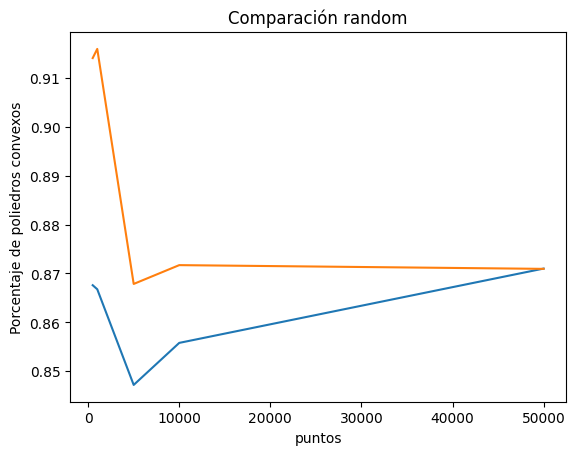

In [ ]:
x =[1,2,3]
y =  [4,5,6]
puntos = [1000,5000,10000,15000,20000,30000,40000,50000]
convex_polys_ir = [polylla_inradoius[i][1] for i in range(len(puntos))]
convex_polys_a = [polylla_area[i][1] for i in range(len(puntos))]
print(convex_polys_a)

plt.plot(puntos,convex_polys_ir, label = 'unión por inradio')
plt.plot(puntos, convex_polys_a, label = 'unión por area')
plt.xlabel('puntos')
plt.ylabel('Porcentaje de poliedros convexos')
plt.title('Comparación random')
plt.show()